In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Anodic set N1 data cleaning

In [87]:
df_anodic_n1 = pd.read_csv('dataset/copy_of_original_data/copy_anodic_N1.csv')

/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_2431/3144696676.py:1: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anodic_n1 = pd.read_csv('dataset/copy_of_original_data/copy_anodic_N1.csv')


In [88]:
df_anodic_n1.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_anodic_n1 = df_anodic_n1.rename(columns={
    'Input A (Acoustic Emission)' : 'time1',
    'Input B (Electrochemical)' : 'time2',
    'Input C (Mechanical)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Anodic Condition) ?':'output'

})
df_anodic_n1.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [ ]:
df_anodic_n1.output = 'anodic'

In [ ]:
df_temp = df_anodic_n1[~df_anodic_n1['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp.isnull().sum(), df_temp.shape

In [ ]:
df_temp = df_temp.iloc[2:].reset_index(drop=True)

In [ ]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']

In [ ]:
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

In [ ]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

In [ ]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [ ]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]
df_time3 = df_time3[:250000]

In [ ]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

In [ ]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

In [ ]:
df_time_temp_1.head()

In [ ]:
cleaned_n1 = df_time_temp_1.copy()
cleaned_n1 = cleaned_n1[['time1','accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n1.head()

In [ ]:
cleaned_n1['output'] = 'anodic'

In [209]:
cleaned_n1.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.05,68800.0,0.000515,0.085482,anodic
1,0.06,58500.0,0.000509,0.085482,anodic
2,0.08,44200.0,0.000497,0.085482,anodic
3,0.10,24000.0,0.000487,0.085482,anodic
4,0.11,23100.0,0.000481,0.085482,anodic


In [208]:
cleaned_n1['output'] = 'anodic'
cleaned_n1.to_csv('dataset/n1_n2_n3_cleaned/anodic_N1.csv', index=False)

### Anodic set N2 data cleaning

In [89]:
df_anodic_n2 = pd.read_csv('dataset/copy_of_original_data/copy_anodic_N2.csv')

/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_2431/434483497.py:1: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anodic_n2 = pd.read_csv('dataset/copy_of_original_data/copy_anodic_N2.csv')


In [90]:
df_anodic_n2.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_anodic_n2 = df_anodic_n2.rename(columns={
    'Input A (Acoustic Emission)' : 'time1',
    'Input B (Electrochemical Data) ' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Anodic Condition) ?':'output'

})
df_anodic_n2.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [91]:
df_anodic_n2.output = 'anodic'

In [95]:
df_temp_n2 = df_anodic_n2[~df_anodic_n2['accoustic_emmision_data'].isnull()]
df_temp_n2 = df_temp_n2[df_temp_n2['mechanical_data'].notnull()]
df_temp_n2.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [96]:
df_temp_n2.head()

,time1,accoustic_emmision_data,time2,electrochemical_data,time3,mechanical_data,output
0,Time,Absolute Energy,Time,Current,Time,Friction Coefficient,anodic
1,seconds,Attojoules,seconds,Amps,seconds,unitless,anodic
2,0.0099468,6.00E+04,0.01,3.31E-06,0.05,0.020012048,anodic
3,0.0199467,9.04E+04,0.02,3.31E-06,0.062,0.020012048,anodic
4,0.0299468,4.46E+04,0.03,3.23E-06,0.077,0.020060241,anodic


In [97]:
df_temp_n2 = df_temp_n2.iloc[2:].reset_index(drop=True)

,time1,accoustic_emmision_data,time2,electrochemical_data,time3,mechanical_data,output
0,0.0099468,6.00E+04,0.01,3.31E-06,0.05,0.020012048,anodic
1,0.0199467,9.04E+04,0.02,3.31E-06,0.062,0.020012048,anodic
2,0.0299468,4.46E+04,0.03,3.23E-06,0.077,0.020060241,anodic
3,0.0399468,3.21E+04,0.04,3.22E-06,0.092,0.020060241,anodic
4,0.0499467,1.74E+04,0.05,3.18E-06,0.107,0.020060241,anodic


In [14]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']


(286265, 7)

In [98]:
for col in cols:
    df_temp_n2[col] = pd.to_numeric(df_temp_n2[col], errors='coerce')
df_temp_n2.shape

(299093, 7)

In [99]:
df_temp_n2 = df_temp_n2[df_temp_n2['accoustic_emmision_data'].notnull()]
df_temp_n2.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [18]:
time_cols = ['time1','time2','time3']

In [100]:
for col in time_cols:
    df_temp_n2[col] = round(df_temp_n2[col], 2)

In [137]:
df_time1 = df_temp_n2[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp_n2[['time2', 'electrochemical_data']]
df_time3 = df_temp_n2[['time3', 'mechanical_data']]
df_time3 = df_time3[875:204835]

In [139]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(299093, 4)

In [140]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]


In [141]:
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')


In [142]:
df_time_temp_1.shape

(201541, 5)

In [143]:
df_time_temp_1.isnull().sum()

time1                      0
accoustic_emmision_data    0
electrochemical_data       0
time3                      0
mechanical_data            0
dtype: int64

In [146]:
cleaned_n2 = df_time_temp_1.copy()

In [171]:
cleaned_n2 = cleaned_n2[['time1','accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n2.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.04,32100.0,0.000003,0.051337
1,0.06,15300.0,0.000003,0.051337
2,0.07,15700.0,0.000003,0.051337
3,0.09,15700.0,0.000003,0.051277
4,0.10,16000.0,0.000003,0.051277


In [214]:
cleaned_n2.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.04,32100.0,0.000003,0.051337,anodic
1,0.06,15300.0,0.000003,0.051337,anodic
2,0.07,15700.0,0.000003,0.051337,anodic
3,0.09,15700.0,0.000003,0.051277,anodic
4,0.10,16000.0,0.000003,0.051277,anodic


In [210]:
cleaned_n2['output'] = 'anodic'
cleaned_n2.to_csv('dataset/n1_n2_n3_cleaned/anodic_N2.csv', index=False)

### Anodic set 3 cleaning

In [148]:
df_anodic_n3 = pd.read_csv('dataset/copy_of_original_data/copy_anodic_N3.csv')

/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_2431/1816020235.py:1: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anodic_n3 = pd.read_csv('dataset/copy_of_original_data/copy_anodic_N3.csv')


In [149]:
df_anodic_n3.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_anodic_n3 = df_anodic_n3.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Anodic Condition) ?':'output'

})
df_anodic_n3.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [150]:
df_anodic_n3.output = 'anodic'

In [151]:
df_temp_n3 = df_anodic_n3[~df_anodic_n3['accoustic_emmision_data'].isnull()]
df_temp_3 = df_temp_n3[df_temp_n3['electrochemical_data'].notnull()]
df_temp_n3 = df_temp_n3[df_temp_n3['mechanical_data'].notnull()]
df_temp_n3.isnull().sum(), df_temp_n3.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (286200, 7))

In [152]:
df_temp_n3 = df_temp_n3.iloc[2:].reset_index(drop=True)
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']

for col in cols:
    df_temp_n3[col] = pd.to_numeric(df_temp_n3[col], errors='coerce')
df_temp_n3.shape, df_temp_3.isnull().sum()

((286198, 7),
 time1                           0
 accoustic_emmision_data         0
 time2                           0
 electrochemical_data            0
 time3                      161678
 mechanical_data            161678
 output                          0
 dtype: int64)

In [153]:
df_temp_n3 = df_temp_n3[df_temp_n3['mechanical_data'].notnull()]
df_temp_n3.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [154]:
df_temp_n3.shape

(286198, 7)

In [156]:
for col in time_cols:
    df_temp_n3[col] = round(df_temp_n3[col], 2)

In [160]:
df_temp_n3.sort_values(by='time3').head()

,time1,accoustic_emmision_data,time2,electrochemical_data,time3,mechanical_data,output
0,0.01,47200.0,0.01,0.00150,0.09,0.190301,anodic
1,0.02,15400.0,0.02,0.00146,0.11,0.190301,anodic
2,0.03,7190.0,0.03,0.00141,0.12,0.190301,anodic
3,0.04,8330.0,0.04,0.00137,0.14,0.190301,anodic
4,0.05,13600.0,0.05,0.00133,0.15,0.190313,anodic


In [161]:
df_time1 = df_temp_n3[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp_n3[['time2', 'electrochemical_data']]
df_time3 = df_temp_n3[['time3', 'mechanical_data']]

In [162]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(286167, 4)

In [163]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape

(190599, 5)

In [164]:
df_time_temp_1.isnull().sum()

time1                      0
accoustic_emmision_data    0
electrochemical_data       0
time3                      0
mechanical_data            0
dtype: int64

In [165]:
cleaned_n3 = df_time_temp_1.copy()

In [167]:
cleaned_n3.head()

,time1,accoustic_emmision_data,electrochemical_data,time3,mechanical_data
0,0.09,10700.0,0.00119,0.09,0.190301
1,0.11,7310.0,0.00113,0.11,0.190301
2,0.12,7360.0,0.00110,0.12,0.190301
3,0.14,7000.0,0.00105,0.14,0.190301
4,0.15,7020.0,0.00102,0.15,0.190313


In [169]:
cleaned_n3 = cleaned_n3[['time1','accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n3.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.09,10700.0,0.00119,0.190301
1,0.11,7310.0,0.00113,0.190301
2,0.12,7360.0,0.00110,0.190301
3,0.14,7000.0,0.00105,0.190301
4,0.15,7020.0,0.00102,0.190313


In [215]:
cleaned_n3['output'] = 'anodic'
cleaned_n3.to_csv('dataset/n1_n2_n3_cleaned/anodic_N3.csv', index=False)

### Concatination of N1, N2 and N3

In [172]:
df_anodic_conacat = pd.concat([cleaned_n1, cleaned_n2, cleaned_n3])
df_anodic_conacat.shape

(582708, 4)

In [174]:
df_anodic_conacat.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.05,68800.0,0.000515,0.085482
1,0.06,58500.0,0.000509,0.085482
2,0.08,44200.0,0.000497,0.085482
3,0.10,24000.0,0.000487,0.085482
4,0.11,23100.0,0.000481,0.085482
5,0.12,23000.0,0.000476,0.083819
6,0.14,23000.0,0.000467,0.083819
7,0.16,23400.0,0.000458,0.083819
8,0.17,23100.0,0.000454,0.083819
9,0.19,22600.0,0.000446,0.081988


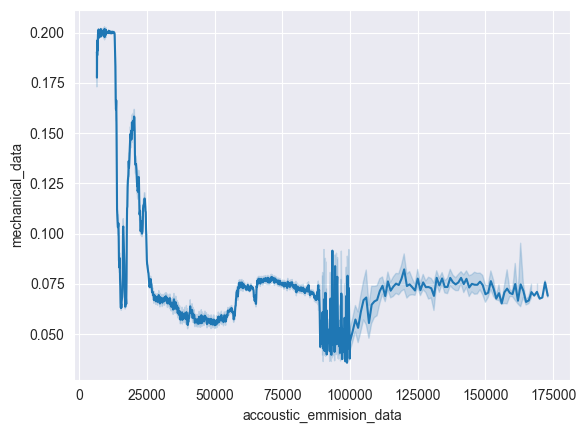

In [178]:
sns.lineplot(df_anodic_conacat, x='accoustic_emmision_data', y='mechanical_data')
plt.show()

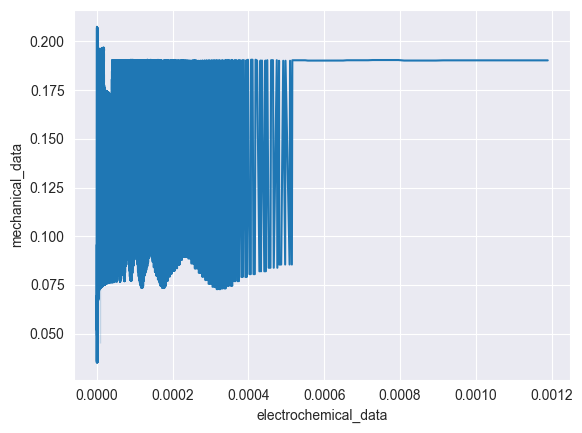

In [180]:
sns.lineplot(df_anodic_conacat, x='electrochemical_data', y='mechanical_data')
plt.show()

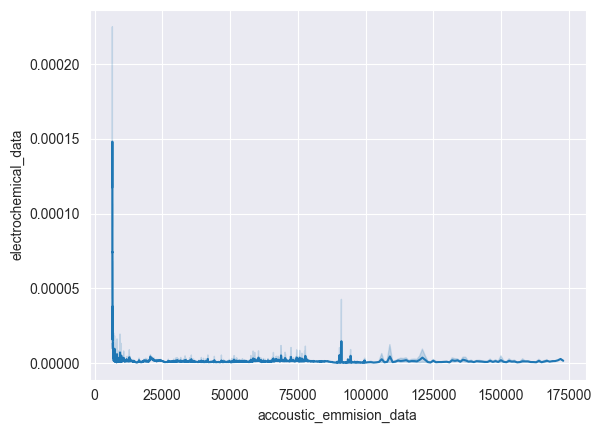

In [181]:
sns.lineplot(df_anodic_conacat, x='accoustic_emmision_data', y='electrochemical_data')
plt.show()

In [182]:
df_anodic_conacat['output'] = 'anodic'

In [183]:
df_anodic_conacat.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.05,68800.0,0.000515,0.085482,anodic
1,0.06,58500.0,0.000509,0.085482,anodic
2,0.08,44200.0,0.000497,0.085482,anodic
3,0.10,24000.0,0.000487,0.085482,anodic
4,0.11,23100.0,0.000481,0.085482,anodic


In [184]:
df_anodic_conacat.to_csv('dataset/anodic_conacat.csv')

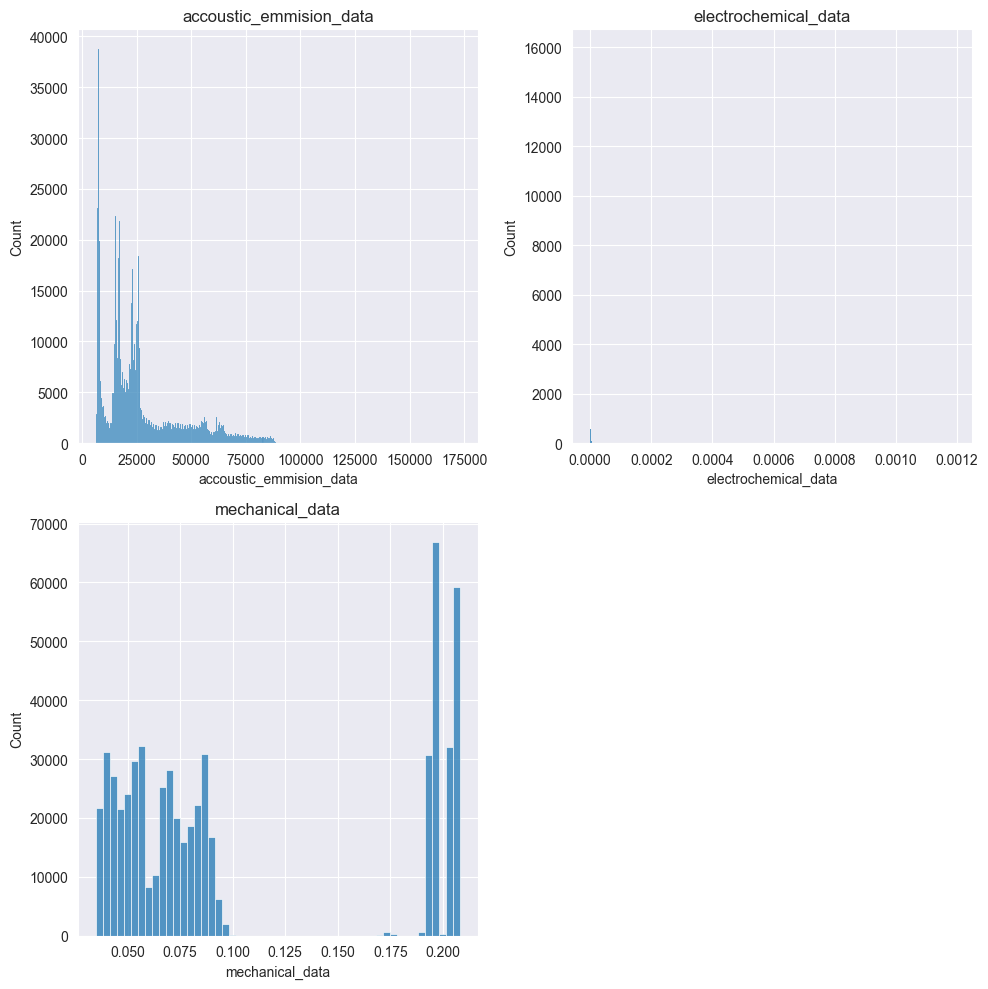

In [200]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(df_anodic_conacat[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

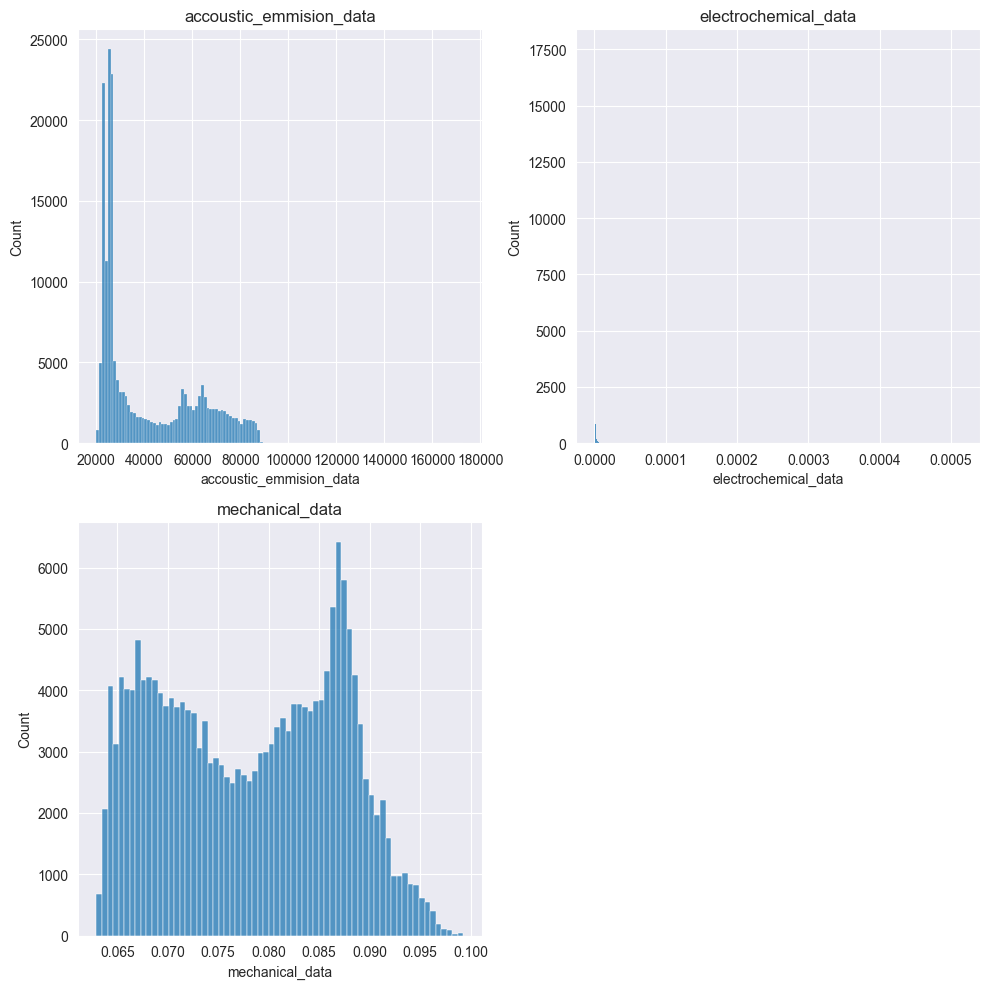

In [201]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n1[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

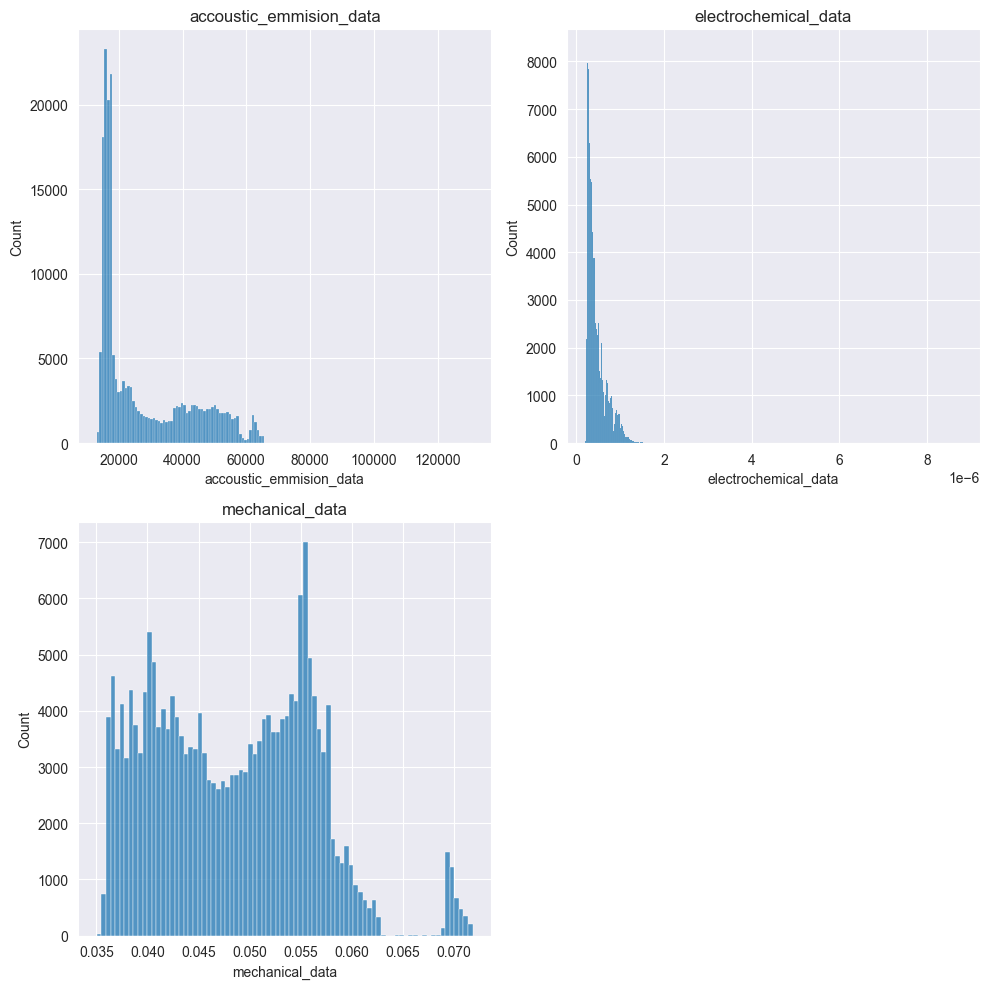

In [202]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n2[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

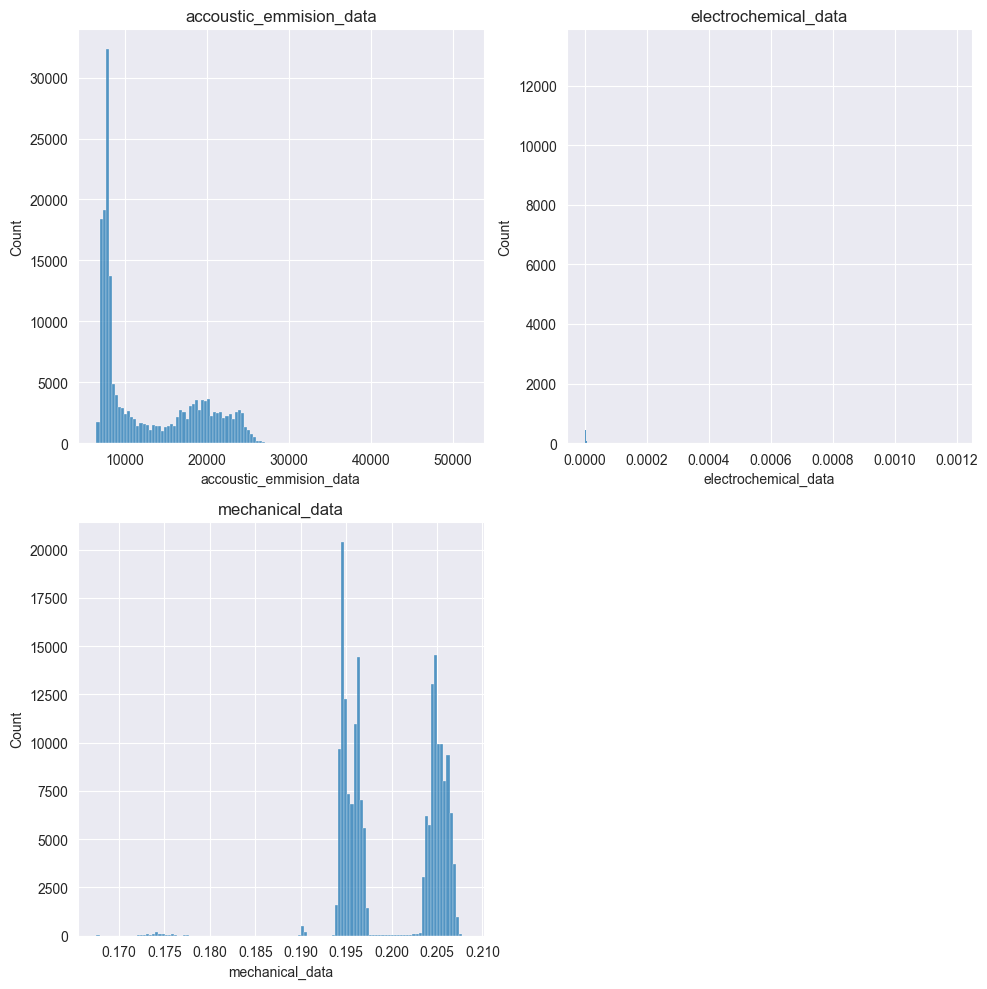

In [203]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n3[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()